In [5]:
import pandas as pd
import numpy as np
import abc
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [82]:
def gen_data(n=200):
    return 0.9*np.random.normal(5,1,n)+ 0.1*np.random.normal(10,1,n)

In [83]:
def real_dist(x):
    return 0.9*np.exp(-0.5*(x-5)**2)/np.sqrt(2*np.pi)+0.1*np.exp(-0.5*(x-10)**2)/np.sqrt(2*np.pi)

In [84]:
class DensityEstimator(abc.ABC):
    @abc.abstractmethod
    def eval(self, X):
        pass

In [139]:
class CustomDE(DensityEstimator):
    def __init__(self,K,X,h=1):
        self.K = K
        self.X = X
        self.h = h
    def eval(self, X):
        return np.array([np.sum([self.K((x-xn)/self.h) for xn in self.X])/len(self.X*self.h) for x in X])

In [126]:
class NormalKernelDE(DensityEstimator):
    def __init__(self,X, h=1):
        self.h = h
        self.X = X
        
    def eval(self, X):
        return np.array([np.sum([np.exp(-0.5*((x-xn)/self.h-1)**2)/np.sqrt(2*np.pi) for xn in self.X])/(len(self.X)*self.h)for x in X])

In [86]:
class UniformKernelDE(DensityEstimator):
    def __init__(self,X, h=1):
        self.h = h
        self.X = X
    def eval(self, X):
        return np.array([np.sum([np.abs((x-xn)/self.h)<0.5 for xn in self.X])/(len(self.X)*self.h) for x in X])

In [129]:
X=gen_data(200)

In [130]:
xlin=np.linspace(2,12,200)

In [136]:
X.max()

np.float64(8.257381187939004)

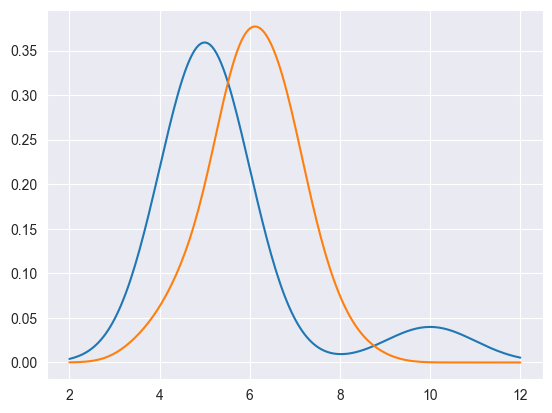

In [134]:
U_estim=UniformKernelDE(X,h=0.5)
S_estim=NormalKernelDE(X,h=0.5)
plt.plot(xlin,real_dist(xlin))
plt.plot(xlin,U_estim.eval(xlin))

In [138]:
def K(y):
    return 1 if np.abs(y)<0.5 else 0 

np.float64(0.0)